In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

# PCA

In [2]:
df = pd.read_excel("../Unsupervised_Learning_2024/Datasets/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
y = df['Class']
X = df.drop('Class', axis=1)

encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

X_mean = Xtrain.mean()
X_std = Xtrain.std()

Xtrain = (Xtrain-X_mean )/X_std

Xtrain.head()

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9572,-0.141692,-0.136682,-0.038200,-0.104024,0.083142,0.335567,-0.147924,-0.060410,0.147509,0.714965,0.454184,-0.202841,-0.072448,-0.301092,-0.239142,-0.203533
10050,0.121644,0.307288,0.376027,0.105852,0.482671,0.634141,0.127225,0.261109,-2.182408,-0.743315,-0.579239,-0.613396,-0.303142,-0.708009,-0.635670,-1.504198
5783,-0.237509,0.035823,0.280025,-0.677696,1.706176,1.257492,-0.230462,-0.183669,0.325144,-1.006478,-1.605627,-1.559436,0.806241,-0.983684,-1.500038,-0.660371
13110,-0.519458,-0.632875,-0.566461,-0.547765,-0.220409,0.059971,-0.524850,-0.570112,-0.578192,0.921120,0.725669,0.123975,0.556948,0.285507,0.085774,0.424952
7061,0.237773,0.564306,0.833775,-0.140007,1.685727,1.249598,0.238068,0.395862,1.155061,-0.180980,-1.365069,-1.521453,-0.037042,-1.202641,-1.466660,0.269240


### Steps to implement PCA

0. Normalize the data
1. Calculate covariance matrix
2. Eigendecomposition of the covariance matrix
3. Feature vector


In [ ]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1) # Only works for standardized data

cov = covariance(Xtrain)
cov.shape

(16, 16)

In [10]:
# Eigendecomposition
eig_vals, eig_vecs = scipy.linalg.eig(cov)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

Eigenvalues 
 [8.86450550e+00+0.j 4.23996769e+00+0.j 1.27875421e+00+0.j
 8.15292903e-01+0.j 4.41693910e-01+0.j 1.84852732e-01+0.j
 1.12026428e-01+0.j 5.18649763e-02+0.j 8.07372313e-03+0.j
 1.44587265e-03+0.j 1.06993134e-03+0.j 2.89435438e-04+0.j
 1.49511571e-04+0.j 9.21899543e-06+0.j 1.78333152e-06+0.j
 2.16705761e-06+0.j]
Eigenvectors 
 [[ 2.82148682e-01  3.10827456e-01  3.25846172e-01  2.36104781e-01
   2.30004873e-01  2.32388089e-01  2.82902563e-01  2.97335423e-01
  -5.96210974e-02 -1.42453566e-01 -2.47580680e-01 -2.39126044e-01
  -2.20896827e-01 -3.14923427e-01 -2.39753379e-01 -1.96798200e-01]
 [ 2.46797592e-01  1.79969595e-01  1.02237961e-01  3.43352841e-01
  -3.29095447e-01 -3.17426528e-01  2.45505667e-01  2.23587897e-01
   2.21625278e-01  1.10580062e-01  2.14577583e-01  3.27165289e-01
  -3.32550093e-01  1.28318910e-01  3.25726895e-01  1.07006672e-01]
 [ 5.79251601e-02  1.61210608e-02  8.27115271e-02 -1.18792921e-02
   1.72164035e-01  1.67080837e-01  5.02857226e-02  4.67301055e-0

/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


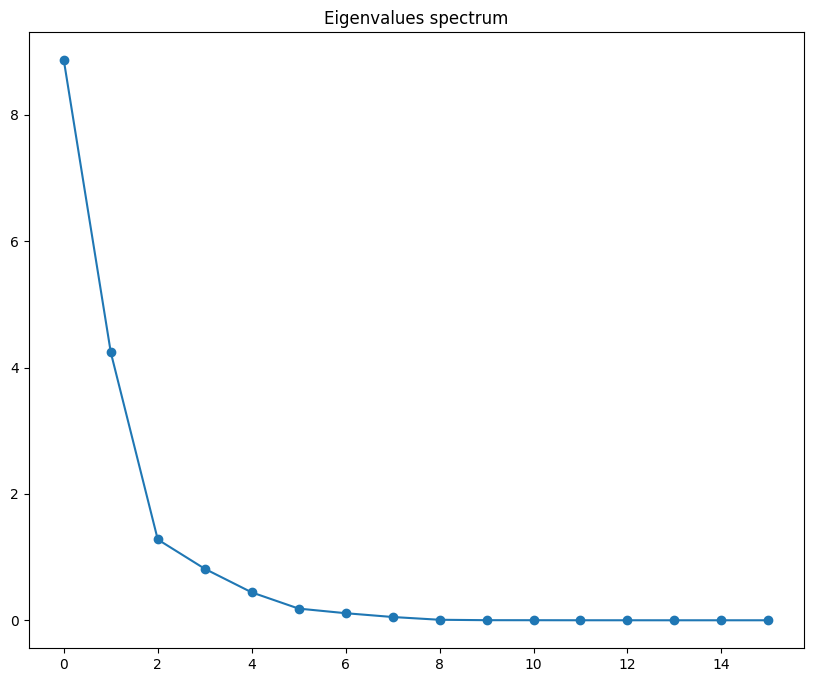

In [11]:
plt.figure(figsize=(10,8))
plt.plot(eig_vals, "o-")
plt.title("Eigenvalues spectrum")
plt.show()

- Project the data (training set) in the first two principal components and color by class. Do it also for three principal components. 

Explained variance: [5.54e+01+0.j 2.65e+01+0.j 7.99e+00+0.j 5.10e+00+0.j 2.76e+00+0.j
 1.16e+00+0.j 7.00e-01+0.j 3.20e-01+0.j 5.00e-02+0.j 1.00e-02+0.j
 1.00e-02+0.j 0.00e+00+0.j 0.00e+00+0.j 0.00e+00+0.j 0.00e+00+0.j
 0.00e+00+0.j]
Cumulative explained variance: [ 55.4 +0.j  81.9 +0.j  89.89+0.j  94.99+0.j  97.75+0.j  98.91+0.j
  99.61+0.j  99.93+0.j  99.98+0.j  99.99+0.j 100.  +0.j 100.  +0.j
 100.  +0.j 100.  +0.j 100.  +0.j 100.  +0.j]


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


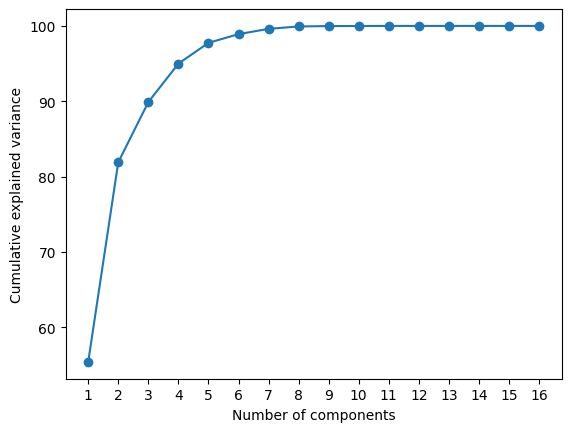

In [17]:
n_samples, n_features = X.shape

eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [12]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])


In [30]:
# Select top k eigenvectors
W = eig_vecs_sorted[:2, :] # Projection matrix

X_new = Xtrain @ W.T
print(X_new.shape)

(10888, 2)


In [32]:
data = np.column_stack((X_new, ytrain))
print(data.shape)

(10888, 3)


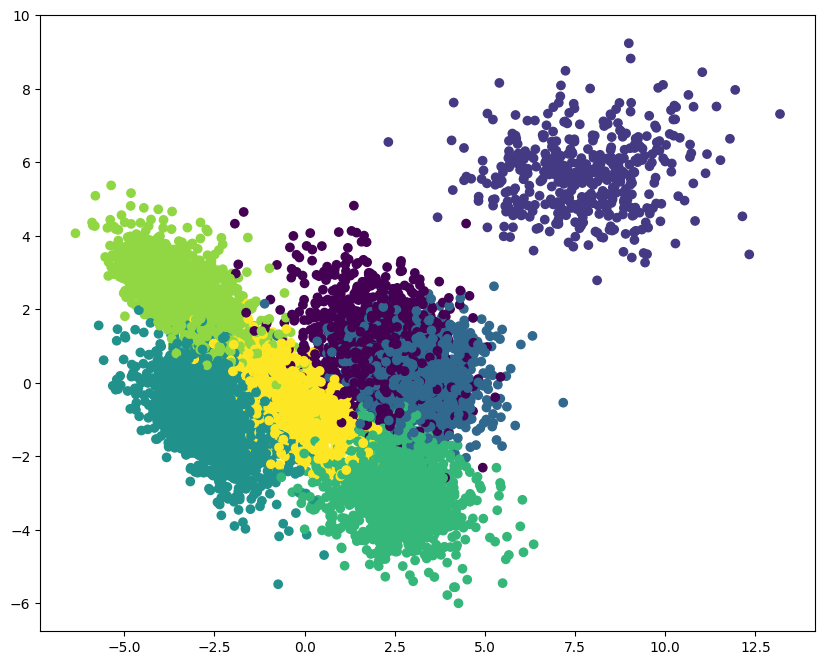

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()

(10888, 3)
(10888, 4)


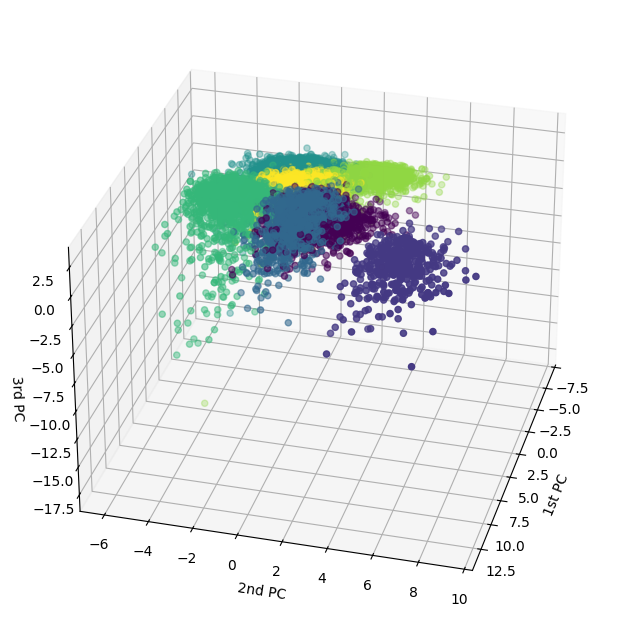

In [36]:
# Select top k eigenvectors
W = eig_vecs_sorted[:3, :] # Projection matrix

X_new = Xtrain @ W.T
print(X_new.shape)

data = np.column_stack((X_new, ytrain))
print(data.shape)

plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,3])
axes.view_init(30,15)
axes.set_xlabel('1st PC')
axes.set_ylabel('2nd PC')
axes.set_zlabel('3rd PC')
plt.show()

- For an increasing number of principal components (1 to 16):
- - Apply a multinomial logistic regression to learn a model on the training set (use  ```sklearn.linear_model.LogisticRegression``` ).
- - Transform the test set with the matrix learned from the traning set. Make a prediction with the logistic model learned. 
- - Assess the quality of the predictions and comment on the results. 

In [46]:
X_new[:,:i+1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
9572,-0.048548,-0.254263,0.653156,0.291250,0.611983,-0.378737,0.234551,-0.134967,-0.027581,-0.021027,-0.006848,0.004150,-0.007828,0.000148,0.000542,0.000536
10050,1.913819,-1.359311,-1.125545,-1.562006,0.891178,-0.430519,0.141566,-0.224979,0.008695,-0.023408,-0.015629,-0.009316,-0.006625,0.000407,-0.000126,0.000030
5783,1.955908,-3.162100,-0.205699,1.071974,-0.643862,0.136095,-0.347019,0.147028,-0.123878,-0.021615,0.010749,-0.006218,-0.004684,0.001016,-0.002437,0.000335
13110,-1.635129,-0.596092,0.763742,-0.520636,0.544973,-0.042827,0.198305,-0.162027,-0.009708,-0.016993,-0.002538,0.013541,-0.004880,-0.000846,0.000572,0.000079
7061,2.688558,-1.752677,1.119556,1.465556,-1.030903,-0.028266,-0.179181,0.350824,0.048000,-0.012634,0.002688,-0.005939,-0.005687,-0.000226,-0.000219,-0.001323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1.779493,-0.219405,0.492060,0.746313,0.631131,-0.773808,-0.206582,-0.486623,0.025483,-0.013980,-0.017284,-0.011618,-0.005802,-0.001188,-0.000192,-0.000013
7668,-0.983355,-1.028078,0.081000,-0.400722,0.196625,-0.085888,0.014828,-0.347041,-0.019698,-0.041723,0.000609,-0.008188,0.002473,-0.001956,0.000242,0.000368
13030,-1.522319,-0.777975,0.442770,-0.143581,0.245991,0.216651,0.382393,0.094143,-0.026612,-0.016625,-0.006690,0.014559,-0.005270,0.001239,0.000702,-0.000652
2015,-1.598885,3.013241,-0.215699,-0.688280,-0.067884,-0.497943,0.176123,0.189976,-0.184110,0.041504,0.024792,0.012555,0.030465,-0.000049,-0.000694,-0.001544


In [48]:
Xtest = (Xtest- Xtest.mean())/Xtest.std() #proprocessing of the test set

W = eig_vecs_sorted # Projection matrix

X_new = np.array(Xtrain @ W.T)
print(X_new.shape)

score = []
for i in range(X_new.shape[1]): #X_new is the PCA transformation of the test set with all components kepts
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_new[:,:i+1], ytrain.ravel())

    x_PC = np.array(Xtest @ W.T)
    x_PC = x_PC[:,:i+1] #keep only the needed PCs
    
    yhat = lr.predict(x_PC)
    print(i, ": ", lr.score(x_PC, ytest.ravel()))
    score.append(lr.score(x_PC, ytest.ravel()))

(10888, 16)
0 :  0.6143958868894601


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1 :  0.8659566654425266
2 :  0.8769739258171135
3 :  0.8887256702166728


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


4 :  0.9250826294528094
5 :  0.9217774513404333


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


6 :  0.9239809034153507
7 :  0.922879177377892


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


8 :  0.922879177377892
9 :  0.9232464193903782


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


10 :  0.9232464193903782
11 :  0.922879177377892


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


12 :  0.922879177377892
13 :  0.9225119353654058


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


14 :  0.922879177377892
15 :  0.922879177377892


/home/alberto/anaconda3/envs/unsupervised/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


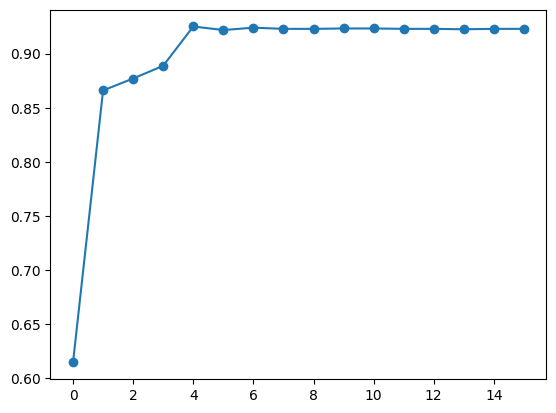

In [49]:
plt.plot(score, "o-")
plt.show()

In [50]:
print(f"The maximum values of the accuracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

The maximum values of the accuracy score is reached with 4 PCs and it is equal to 0.9250826294528094


# Notes on the swiss roll

PCA can't unfold the swiss roll.